# Introduction:
### In recent years we have seen a large spike of obesity within the around the world and while many will come to the conclusion that the reason for the spike of obesity is that people are getting a lot "lazier" and "choose" not to improve their health, I believe that there is many external factors that contributes to one's weight that they don't have much power in choosing such as a stressful enironment, less gifted metabolism at birth, economic factors, and lack of a support system. My goal for this project is to use data analysis on the spikes of external issues within the country that contribute to this health problem and take opinions of reddit users who themselves may have dealt with obesity and see what they believe lead to their obesity and see what people suggest can help solve this and will also prove how much of an impact these external factors have and find what exactly are the most common external problems.


# Research Questions:
## 1. What external factors are leading to the rise of obesity?

## 2. What are some issues we can work towards to slow down this rise?

In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import praw
from string import punctuation
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Rise of obesity over the years
### Data published by the World Health Organization in 2022

In [6]:
rise = pd.read_csv("../../digprojdata/adult_obesity.csv")
rise.head(5)

,Entity,Code,Year,"Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%) - Sex:Both sexes"
0,Afghanistan,AFG,1975,0.4
1,Afghanistan,AFG,1976,0.4
2,Afghanistan,AFG,1977,0.5
3,Afghanistan,AFG,1978,0.5
4,Afghanistan,AFG,1979,0.5


In [16]:
#rename long column name
rise = rise.rename(columns = {"Indicator:Prevalence of obesity among adults, BMI &GreaterEqual; 30 (crude estimate) (%) - Sex:Both sexes" : "Obesity Percentage"})
rise.head(-5)

,Entity,Year,Obesity Percentage
0,Afghanistan,1975,0.4
1,Afghanistan,1976,0.4
2,Afghanistan,1977,0.5
3,Afghanistan,1978,0.5
4,Afghanistan,1979,0.5
...,...,...,...
8474,Zimbabwe,2007,9.9
8475,Zimbabwe,2008,10.1
8476,Zimbabwe,2009,10.3
8477,Zimbabwe,2010,10.6


<AxesSubplot:xlabel='Year', ylabel='Obesity Percentage'>

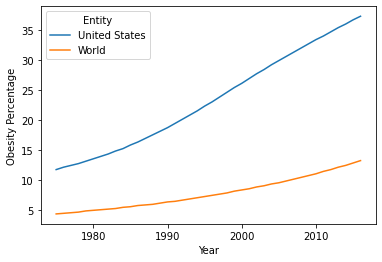

In [32]:
#let's do time series line plots globally and for the united states
us_only = rise.loc[(rise['Entity'] == 'United States') | (rise['Entity'] == 'World')]
us_only.head(10)
sns.lineplot(x='Year', y='Obesity Percentage', ci = None, hue = 'Entity', data = us_only)

# Why this is an important topic
#### In 2017 it was recorded that over 8% of deaths worldwide were a result of obesity and the fact that this number has only been increasing over the years should prove a huge concern. Using global data by the GBD that recorded the percentage of deaths from 1990 I will show this graphically.

In [33]:
mortalities = pd.read_csv("../../digprojdata/mortality.csv")
mortalities.head()

,Entity,Code,Year,Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,7.037503
1,Afghanistan,AFG,1991,6.979205
2,Afghanistan,AFG,1992,6.995896
3,Afghanistan,AFG,1993,6.879857
4,Afghanistan,AFG,1994,6.627227


In [34]:
#rename long column
mortalities = mortalities.rename(columns = {"Deaths - Cause: All causes - Risk: High body-mass index - Sex: Both - Age: Age-standardized (Percent)" : "Obesity Related Deaths(%)"})
mortalities.head()

,Entity,Code,Year,Obesity Related Deaths(%)
0,Afghanistan,AFG,1990,7.037503
1,Afghanistan,AFG,1991,6.979205
2,Afghanistan,AFG,1992,6.995896
3,Afghanistan,AFG,1993,6.879857
4,Afghanistan,AFG,1994,6.627227


<AxesSubplot:xlabel='Year', ylabel='Obesity Related Deaths(%)'>

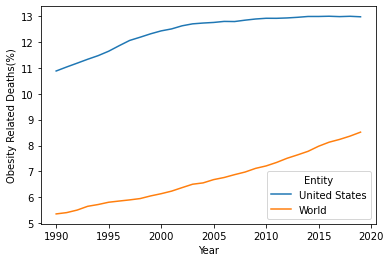

In [35]:
#let's do time series line plots globally and for the united states
two_mortals = mortalities.loc[(mortalities['Entity'] == 'United States') | (mortalities['Entity'] == 'World')]
us_only.head(10)
sns.lineplot(x='Year', y='Obesity Related Deaths(%)', ci = None, hue = 'Entity', data = two_mortals)

### It is scary to see how fast this percentage is rising for the world and it doesn't seem to be slowing down. Many may have assumed that this would only be a United States issue but the trends show that unfortunately the world is catching up.

# Factors that contribute to obesity


In [237]:
#Analyze data given by CDC
cdc = pd.read_csv("../../digprojdata/CDC_2016.csv")
cdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ï»¿YearStart             53392 non-null  int64  
 1   LocationAbbr             53392 non-null  object 
 2   LocationDesc             53392 non-null  object 
 3   Class                    53392 non-null  object 
 4   Topic                    53392 non-null  object 
 5   Question                 53392 non-null  object 
 6   Data_Value               48346 non-null  float64
 7   Sample_Size              48346 non-null  object 
 8   Total                    1907 non-null   object 
 9   Age(years)               11438 non-null  object 
 10  Education                7628 non-null   object 
 11  Gender                   3814 non-null   object 
 12  Income                   13349 non-null  object 
 13  Race/Ethnicity           15256 non-null  object 
 14  StratificationCategory

In [51]:
#rename year start column since it has weird name
cdc = cdc.rename(columns = {"ï»¿YearStart" : "YearStart"})
cdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                53392 non-null  int64  
 1   LocationAbbr             53392 non-null  object 
 2   LocationDesc             53392 non-null  object 
 3   Class                    53392 non-null  object 
 4   Topic                    53392 non-null  object 
 5   Question                 53392 non-null  object 
 6   Data_Value               48346 non-null  float64
 7   Sample_Size              48346 non-null  object 
 8   Total                    1907 non-null   object 
 9   Age(years)               11438 non-null  object 
 10  Education                7628 non-null   object 
 11  Gender                   3814 non-null   object 
 12  Income                   13349 non-null  object 
 13  Race/Ethnicity           15256 non-null  object 
 14  StratificationCategory

## Standout factors from this data are education, income, and race/ethnicity

## Going to first check how much income effects Obesity rates

In [58]:
#Create a separate dataframe for income
income = cdc[cdc['StratificationCategory1'] == 'Income']
income = income.reset_index(drop = True)
quest = 'Percent of adults aged 18 years and older who have obesity'
income = income[income['Question'] == quest]
income = income[income['YearStart'] == 2014]
income = income[~(income['LocationDesc'] == 'National')]
income = income.reset_index(drop = True)
income = income[['YearStart', 'LocationDesc', 'Data_Value', 'Income']]

#applies a 1 to the income group the respondent belongs in and 0 for the others
for i in income.Income.unique():
    income[i] = income['Income'].apply(lambda x: int(x==i))

income = income[~(income.Income == 'Data not reported')]
income.head()

,YearStart,LocationDesc,Data_Value,Income,"Less than $15,000","$15,000 - $24,999","$25,000 - $34,999","$35,000 - $49,999","$50,000 - $74,999","$75,000 or greater",Data not reported
0,2014,Alabama,34.5,"Less than $15,000",1,0,0,0,0,0,0
1,2014,Alabama,40.6,"$15,000 - $24,999",0,1,0,0,0,0,0
2,2014,Alabama,35.4,"$25,000 - $34,999",0,0,1,0,0,0,0
3,2014,Alabama,35.5,"$35,000 - $49,999",0,0,0,1,0,0,0
4,2014,Alabama,32.4,"$50,000 - $74,999",0,0,0,0,1,0,0


([<matplotlib.axis.YTick at 0x2151da13f10>,
 [Text(0, 0, 'Less than $15,000'),
  Text(0, 1, '$15,000 - $24,999'),
  Text(0, 2, '$25,000 - $34,999'),
  Text(0, 3, '$35,000 - $49,999'),
  Text(0, 4, '$50,000 - $74,999'),
  Text(0, 5, '$75,000 or greater')])

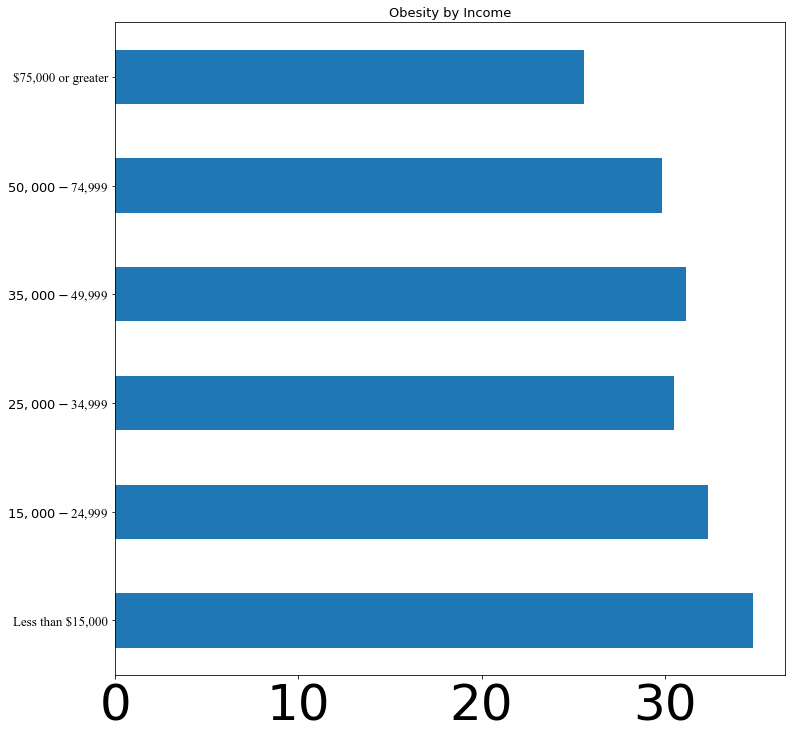

In [238]:
#Going to get mean of obesity rate for each income group

income_obesity = income.groupby('Income', as_index = False).mean()
income_obesity['Ordering'] = [1, 2, 3, 4, 5, 0]

income_sort = income_obesity.sort_values(['Ordering'], ascending = [True])
plt.figure(figsize = (12, 12))
income_sort.Data_Value.plot(kind = 'barh')
plt.title('Obesity by Income', fontsize = 13)
plt.yticks(range(6), income_sort.Income, fontsize = 13, family = 'Times New Roman')

# Top income level has significantly lower rates than lowest income level

# How education effects obesity

In [75]:
#Create a separate dataframe for education
educ = cdc[cdc['StratificationCategory1'] == 'Education']
educ = educ.reset_index(drop = True)
quest = 'Percent of adults aged 18 years and older who have obesity'
educ = educ[educ['Question'] == quest]
educ = educ[educ['YearStart'] == 2014]
educ = educ[~(educ['LocationDesc'] == 'National')]
educ = educ.reset_index(drop = True)
educ = educ[['YearStart', 'LocationDesc', 'Data_Value', 'Education']]

for i in educ.Education.unique():
    educ[i] = educ['Education'].apply(lambda x: int(x==i))

educ = educ[~(educ.Education == 'Data not reported')]
educ.head()
educ.Education.unique()

array(['Less than high school', 'High school graduate',
       'Some college or technical school', 'College graduate'],
      dtype=object)

([<matplotlib.axis.YTick at 0x21501e0aa00>,
 [Text(0, 0, 'Some college or technical school'),
  Text(0, 1, 'College graduate'),
  Text(0, 2, 'High school graduate'),
  Text(0, 3, 'Less than high school')])

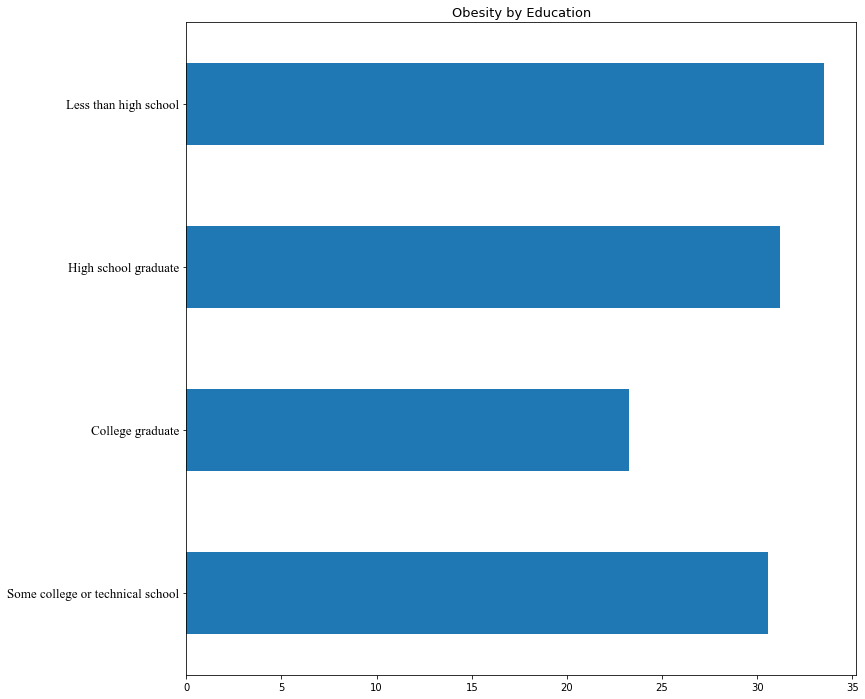

In [79]:
#Going to get mean for each education level of obesity rate

educ_obesity = educ.groupby('Education', as_index = False).mean()
educ_obesity['Ordering'] = [1, 2, 3, 0]

educ_sort = educ_obesity.sort_values(['Ordering'], ascending = [True])
plt.figure(figsize = (12, 12))
educ_sort.Data_Value.plot(kind = 'barh')
plt.title('Obesity by Education', fontsize = 13)
plt.yticks(range(4), educ_sort.Education, fontsize = 13, family = 'Times New Roman')

### Education levels don't have too much of an effect unless you are a college graduate however this shows we can continue to support people from all backgrounds in acheiving educational success.

# How Race/Ethnicity effects obesity

In [86]:
cdc = cdc.rename(columns = {"Race/Ethnicity" : "Ethnicity"})
cdc.head()

,YearStart,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Sample_Size,Total,Age(years),Education,Gender,Income,Ethnicity,StratificationCategory1,Stratification1
0,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,"7,304",Total,NaN,NaN,NaN,NaN,NaN,Total,Total
1,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,"2,581",NaN,NaN,NaN,Male,NaN,NaN,Gender,Male
2,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,"4,723",NaN,NaN,NaN,Female,NaN,NaN,Gender,Female
3,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,"1,153",NaN,NaN,Less than high school,NaN,NaN,NaN,Education,Less than high school
4,2011,AL,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,"2,402",NaN,NaN,High school graduate,NaN,NaN,NaN,Education,High school graduate


In [96]:
#Create a separate dataframe for race
race = cdc[cdc['StratificationCategory1'] == 'Race/Ethnicity']
race = race.reset_index(drop = True)
quest = 'Percent of adults aged 18 years and older who have obesity'
race = race[race['Question'] == quest]
race.head()
race = race[race['YearStart'] == 2014]
race = race[~(race['LocationDesc'] == 'National')]
race = race.reset_index(drop = True)
race = race[['YearStart', 'LocationDesc', 'Data_Value', 'Ethnicity']]

for i in race.Ethnicity.unique():
    race[i] = race['Ethnicity'].apply(lambda x: int(x==i))

race = race[~(race.Ethnicity == 'Data not reported')]
race.head()

,YearStart,LocationDesc,Data_Value,Ethnicity,Non-Hispanic White,Non-Hispanic Black,Hispanic,Asian,Hawaiian/Pacific Islander,American Indian/Alaska Native,2 or more races,Other
0,2014,Alabama,31.4,Non-Hispanic White,1,0,0,0,0,0,0,0
1,2014,Alabama,41.9,Non-Hispanic Black,0,1,0,0,0,0,0,0
2,2014,Alabama,22.9,Hispanic,0,0,1,0,0,0,0,0
3,2014,Alabama,NaN,Asian,0,0,0,1,0,0,0,0
4,2014,Alabama,NaN,Hawaiian/Pacific Islander,0,0,0,0,1,0,0,0


In [104]:
#Delete rows that don't have enough data and fix names
race = race.drop(race[race.Ethnicity == 'American Indian/Alaska Native'].index)
race = race.drop(race[race.Ethnicity == 'Hawaiian/Pacific Islander'].index)
race = race.drop(race[race.Ethnicity == '2 or more races'].index)
race.Ethnicity.unique()

array(['Non-Hispanic White', 'Non-Hispanic Black', 'Hispanic', 'Asian'],
      dtype=object)

([<matplotlib.axis.YTick at 0x2150242bbb0>,
 [Text(0, 0, 'Asian'),
  Text(0, 1, 'Non-Hispanic White'),
  Text(0, 2, 'Hispanic'),
  Text(0, 3, 'Non-Hispanic Black')])

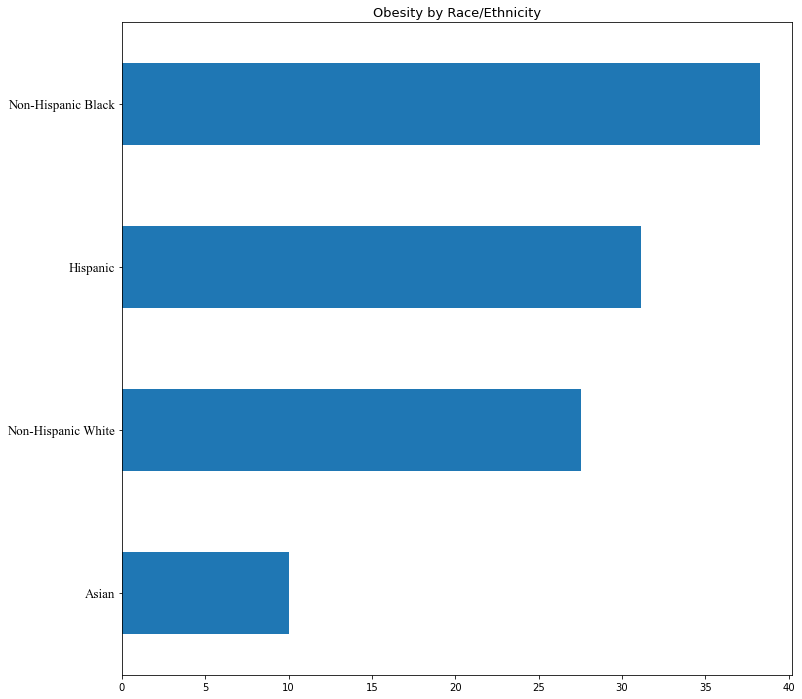

In [109]:
#Going to get mean for race of obesity rate

eth_obesity = race.groupby('Ethnicity', as_index = False).mean()
eth_obesity['Ordering'] = [0, 2, 3, 1]

eth_sort = eth_obesity.sort_values(['Ordering'], ascending = [True])
plt.figure(figsize = (12, 12))
eth_sort.Data_Value.plot(kind = 'barh')
plt.title('Obesity by Race/Ethnicity', fontsize = 13)
plt.yticks(range(4), eth_sort.Ethnicity, fontsize = 13, family = 'Times New Roman')

## We can see just how much higher of a chance you fall to fall in the obesity category depending on your race as there is many barriers that certain races face that many contribute.

# Obesity is more common across different races and economic situation further proving how external factor play a role

# Let's get personal perspectives from Reddit using Reddit API
#### Now that we've seen data and numbers across the globe regarding obesity I want to try getting some information from reddit to see what others feel the issue may be or what their personal experience has been like

In [115]:
reddit = praw.Reddit(client_id='id',
                     client_secret='secret',
                     password= f"{'password'}:{'auth'}",
                     user_agent='dh by /u/user', 
                     username='user'
                    )

# After some research on what subreddit obesity gets talked about the most, I've found r/loseit to be a clear winner with close to 3.5 million followers.

In [116]:
subreddit = reddit.subreddit('loseit')
subreddit.description_html

'<!-- SC_OFF --><div class="md"><p><a href="#bigspecialbutton"></a><a href="http://i.imgur.com/rBh2fM3.png">How to <strong>set your flair</strong></a></p>\n\n<p><a href="https://www.facebook.com/groups/1646399518996210"></a>\n<a href="https://www.instagram.com/rloseit/"></a>\n<a href="https://twitter.com/rloseitofficial"></a></p>\n\n<hr/>\n\n<p><strong>A place for people of all sizes to discuss healthy and sustainable methods of weight loss. Whether you need to lose 2 lbs or 200 lbs, you are welcome here!</strong></p>\n\n<p><a href="#specialbutton"></a><a href="https://www.reddit.com/message/compose?to=%2Fr%2Floseit">Message the Moderators</a> </p>\n\n<p><a href="#specialbutton"></a><a href="https://www.reddit.com/message/compose/?to=/r/LoseitChallengeAdmin">Message the Challenge Admins</a></p>\n\n<p><a href="https://calendar.google.com/calendar/embed?src=loseit.moderator%40gmail.com"></a></p>\n\n<hr/>\n\n<blockquote>\n<h1>Help &amp; Resources</h1>\n\n<p><a href="https://www.reddit.com

In [219]:
# Getting dataframe ready to save time for tf-idf later on
pd_col = ['type', 'text']
red_df = pd.DataFrame(columns = pd_col)
red_df

,type,text


In [220]:
#Get the 20 hottest post on this subreddit including sticky post/pinned post by moderators.
hot_lose = subreddit.hot(limit = 20)
all_texts = []


#Want to use all the text including title, post description so I will paste these text to a df and one string
for submission in hot_lose:
    all_texts.append(submission.title)
    red_df = red_df.append({'type' : 'title', 'text' : submission.title}, ignore_index=True)
    all_texts.append(submission.selftext)
    red_df = red_df.append({'type' : 'description', 'text' : submission.selftext}, ignore_index=True)
    submission.comments.replace_more(limit=0)
    for comment in submission.comments:
        all_texts.append(comment.body)
        red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)

all_texts

C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'title', 'text' : submission.title}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'description', 'text' : submission.selftext}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and 

C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be remov

C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be remov

C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be remov

C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be remov

C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be remov

C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be remov

C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be remov

C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be remov

C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  red_df = red_df.append({'type' : 'comment', 'text' : comment.body}, ignore_index=True)
C:\Users\silve\AppData\Local\Temp\ipykernel_7400\233050463.py:16: FutureWarning: The frame.append method is deprecated and will be remov

['★OFFICIAL DAILY★ Daily Q&A Thread June 30, 2022',
 "# Got a question? We've got answers!\n\nDo you have question but don't want to make a whole post? That's fine. **Ask right here!** What is on your mind? **Everyone is welcome** to ask questions or provide answers. No question is too minor or small.\n\n**TIPS**:\n\n* Include your stats if appropriate/relevant (or better yet, update your flair!)\n* Check the [FAQ](https://www.reddit.com/r/loseit/wiki/faq) and other resources in the sidebar!\n\n*Due to space limitations, this may be a sticky only occasionally.* ***Please find it daily using the sidebar if needed.***\n\n**Don't forget to comment and interact with other posters here, let's keep the good vibes going!**\n\n*Daily Threads*\n\n* [**US Accountability Challenge**](https://www.reddit.com/r/loseit/search/?q=author%3AMountainlioness404d%20title%3Aaccountability&restrict_sr=1&sort=new): Stay accountable with friends from North America.\n* [**EU Accountability Challenge**](https://

In [221]:
red_df

,type,text
0,title,"★OFFICIAL DAILY★ Daily Q&A Thread June 30, 2022"
1,description,# Got a question? We've got answers!\n\nDo you...
2,comment,I am finally gaining muscle and going to the g...
3,comment,Any tips on keeping up motivation? Been yoyo ...
4,comment,Sister just got engaged and everyone is freaki...
...,...,...
334,comment,So relatable. I think we all (or most know) th...
335,comment,When I begun my journey I was completely unawa...
336,comment,I used a weight smoother for that.\nHappyscale...
337,comment,I'm fighting with water weight as well.\nBefor...


In [125]:
#combine this array to a string
text_string = "".join(all_texts)
text_string

'★OFFICIAL DAILY★ Daily Q&A Thread June 29, 2022# Got a question? We\'ve got answers!\n\nDo you have question but don\'t want to make a whole post? That\'s fine. **Ask right here!** What is on your mind? **Everyone is welcome** to ask questions or provide answers. No question is too minor or small.\n\n**TIPS**:\n\n* Include your stats if appropriate/relevant (or better yet, update your flair!)\n* Check the [FAQ](https://www.reddit.com/r/loseit/wiki/faq) and other resources in the sidebar!\n\n*Due to space limitations, this may be a sticky only occasionally.* ***Please find it daily using the sidebar if needed.***\n\n**Don\'t forget to comment and interact with other posters here, let\'s keep the good vibes going!**\n\n*Daily Threads*\n\n* [**US Accountability Challenge**](https://www.reddit.com/r/loseit/search/?q=author%3AMountainlioness404d%20title%3Aaccountability&restrict_sr=1&sort=new): Stay accountable with friends from North America.\n* [**EU Accountability Challenge**](https://w

In [133]:
#remove punctuation
for char in punctuation:
    text_string = text_string.replace(char, "")
#lowercase words so they don't count as unique words based of capitalization.
text_string = text_string.lower()

In [135]:
#Get tokens
text_tokens = word_tokenize(text_string)
text_tokens

['★official',
 'daily★',
 'daily',
 'qa',
 'thread',
 'june',
 '29',
 '2022',
 'got',
 'a',
 'question',
 'weve',
 'got',
 'answers',
 'do',
 'you',
 'have',
 'question',
 'but',
 'dont',
 'want',
 'to',
 'make',
 'a',
 'whole',
 'post',
 'thats',
 'fine',
 'ask',
 'right',
 'here',
 'what',
 'is',
 'on',
 'your',
 'mind',
 'everyone',
 'is',
 'welcome',
 'to',
 'ask',
 'questions',
 'or',
 'provide',
 'answers',
 'no',
 'question',
 'is',
 'too',
 'minor',
 'or',
 'small',
 'tips',
 'include',
 'your',
 'stats',
 'if',
 'appropriaterelevant',
 'or',
 'better',
 'yet',
 'update',
 'your',
 'flair',
 'check',
 'the',
 'faqhttpswwwredditcomrloseitwikifaq',
 'and',
 'other',
 'resources',
 'in',
 'the',
 'sidebar',
 'due',
 'to',
 'space',
 'limitations',
 'this',
 'may',
 'be',
 'a',
 'sticky',
 'only',
 'occasionally',
 'please',
 'find',
 'it',
 'daily',
 'using',
 'the',
 'sidebar',
 'if',
 'needed',
 'dont',
 'forget',
 'to',
 'comment',
 'and',
 'interact',
 'with',
 'other',
 'post

## Lemmatize

In [142]:
lem = WordNetLemmatizer()
perlem = [lem.lemmatize(token) for token in text_tokens]
per = [word for word in text_tokens if word not in stopwords.words('english')]
per

['★official',
 'daily★',
 'daily',
 'qa',
 'thread',
 'june',
 '29',
 '2022',
 'got',
 'question',
 'weve',
 'got',
 'answers',
 'question',
 'dont',
 'want',
 'make',
 'whole',
 'post',
 'thats',
 'fine',
 'ask',
 'right',
 'mind',
 'everyone',
 'welcome',
 'ask',
 'questions',
 'provide',
 'answers',
 'question',
 'minor',
 'small',
 'tips',
 'include',
 'stats',
 'appropriaterelevant',
 'better',
 'yet',
 'update',
 'flair',
 'check',
 'faqhttpswwwredditcomrloseitwikifaq',
 'resources',
 'sidebar',
 'due',
 'space',
 'limitations',
 'may',
 'sticky',
 'occasionally',
 'please',
 'find',
 'daily',
 'using',
 'sidebar',
 'needed',
 'dont',
 'forget',
 'comment',
 'interact',
 'posters',
 'lets',
 'keep',
 'good',
 'vibes',
 'going',
 'daily',
 'threads',
 'us',
 'accountability',
 'challengehttpswwwredditcomrloseitsearchqauthor3amountainlioness404d20title3aaccountabilityrestrictsr1sortnew',
 'stay',
 'accountable',
 'friends',
 'north',
 'america',
 'eu',
 'accountability',
 'challeng

In [240]:
#Get top 50 frequent words
frequency = Counter(per)
print(frequency.most_common(50))

[('’', 306), ('weight', 143), ('like', 83), ('im', 76), ('week', 70), ('get', 63), ('food', 57), ('going', 53), ('much', 49), ('also', 49), ('really', 47), ('day', 46), ('good', 45), ('eating', 45), ('eat', 45), ('calories', 44), ('make', 43), ('lose', 43), ('go', 43), ('loss', 42), ('lbs', 41), ('look', 40), ('ive', 40), ('days', 40), ('got', 38), ('lost', 36), ('started', 36), ('back', 36), ('know', 36), ('time', 35), ('feel', 35), ('dont', 34), ('body', 34), ('lot', 33), ('healthy', 33), ('want', 32), ('work', 32), ('water', 32), ('something', 32), ('would', 30), ('great', 30), ('even', 30), ('keep', 29), ('still', 29), ('way', 29), ('daily', 28), ('since', 28), ('see', 28), ('losing', 27), ('think', 27)]


In [148]:
#position tagging
tags = nltk.pos_tag(per)
tag2 = nltk.FreqDist(tag for (word, tag) in tags)
tag2.most_common(15)

[('NN', 3170),
 ('JJ', 1926),
 ('NNS', 897),
 ('RB', 865),
 ('VBG', 604),
 ('VBP', 585),
 ('CD', 573),
 ('VBD', 512),
 ('VB', 287),
 ('IN', 210),
 ('VBN', 197),
 ('NNP', 188),
 ('VBZ', 134),
 ('MD', 69),
 ('JJR', 54)]

In [166]:
#Take just the present particple verbs
nouns = [word for word, pos in tags if pos.startswith('VBG')]
new_freq = Counter(nouns)
print(new_freq.most_common(40))

[('going', 53), ('eating', 34), ('losing', 26), ('getting', 19), ('making', 18), ('taking', 13), ('starting', 12), ('lifting', 12), ('trying', 11), ('counting', 11), ('walking', 10), ('working', 10), ('giving', 10), ('amazing', 10), ('seeing', 8), ('sharing', 8), ('looking', 8), ('posting', 7), ('feeling', 6), ('using', 5), ('keeping', 5), ('tracking', 5), ('exciting', 5), ('saying', 5), ('moving', 5), ('knowing', 5), ('craving', 5), ('running', 4), ('hoping', 4), ('breastfeeding', 4), ('fasting', 4), ('finding', 4), ('enabling', 4), ('consuming', 4), ('pushing', 4), ('inspiring', 4), ('thinking', 3), ('dropping', 3), ('holding', 3), ('gaining', 3)]


In [169]:
#Plot these verbs as a plot bar
frame = pd.DataFrame(new_freq.most_common(40), columns = ["words", "count"])
frame.set_index("words", inplace = True)
frame.drop(frame.columns[1:], inplace = True)

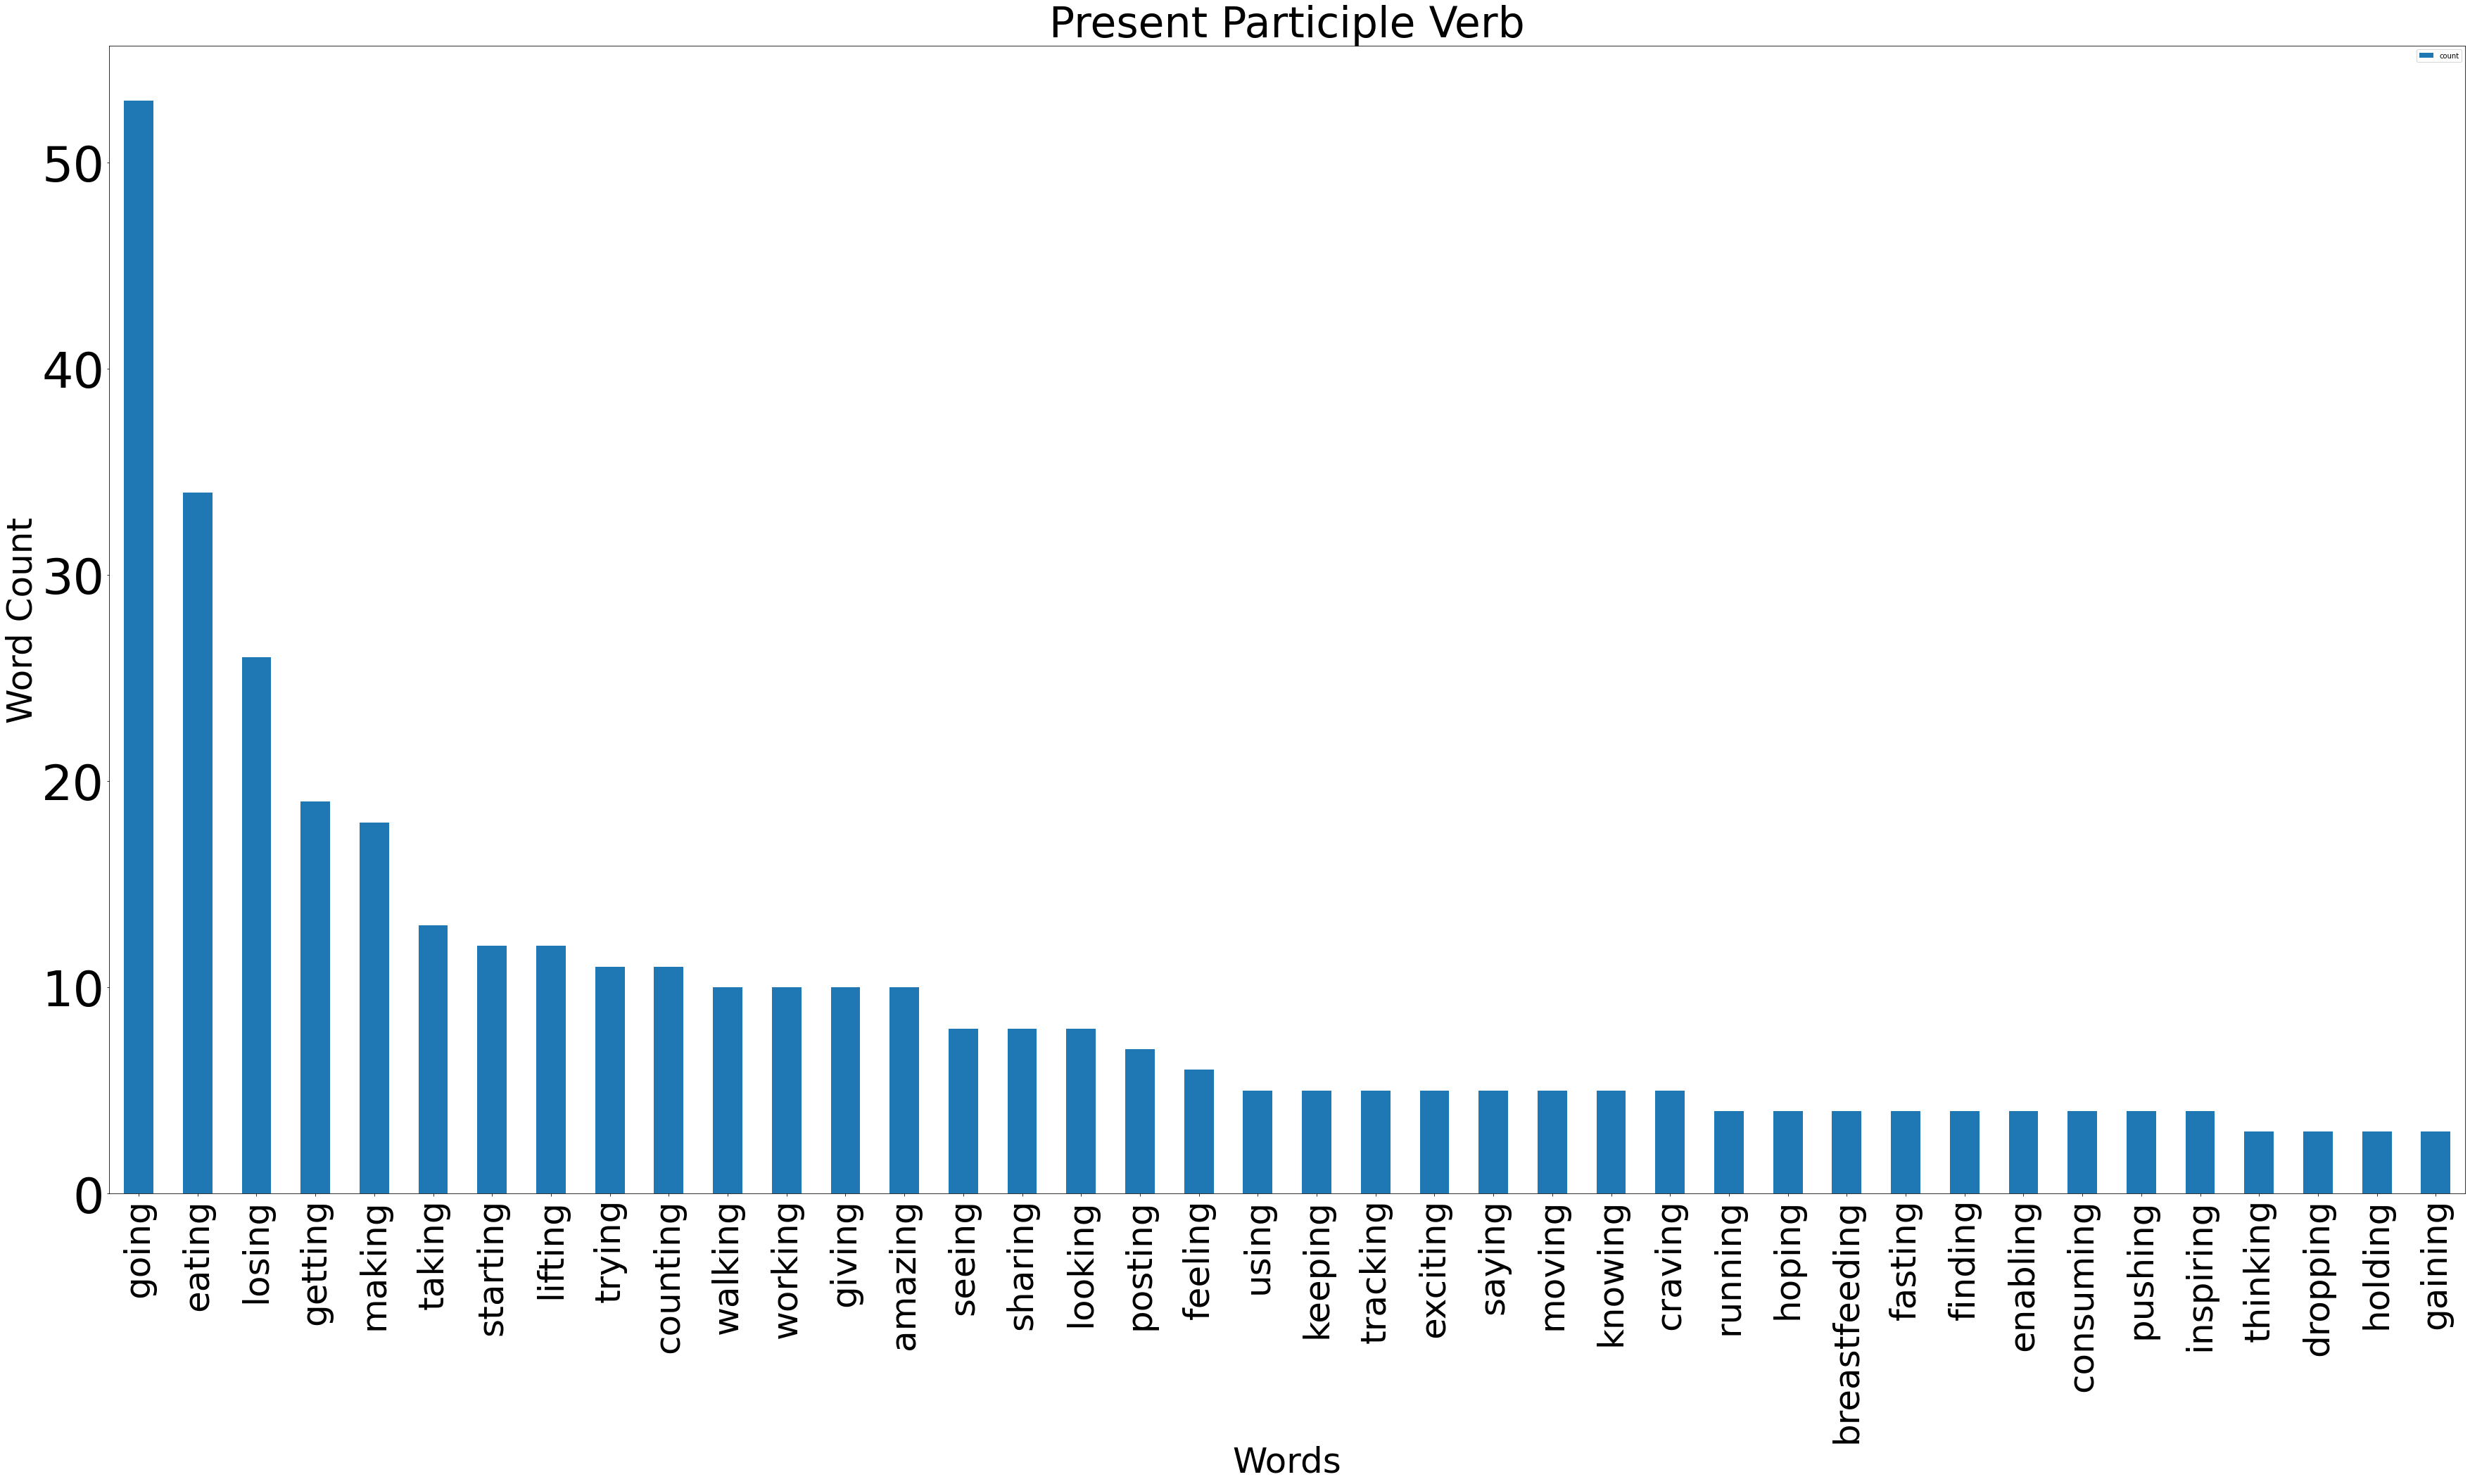

In [182]:
frame.plot.bar(x=None, y=None, figsize = (60, 30))
plt.title('Present Participle Verb', fontsize = 60)
plt.xlabel('Words', fontsize = 50)
plt.ylabel('Word Count', fontsize = 50)
mp.rc('xtick', labelsize=50)
mp.rc('ytick', labelsize = 70)

### Many gym terms were counted however this chart can still be helpful as it can tell one's personal progress or feelings such as "going" which may imply going to the gym, "eating" which describes what they consume in a day, and "trying", and "working" which may so how one attempts to make progress but they may have obstacles in the way which can touch on a mental health and environment issue that may make it harder to escape obesity.

# Using TD-IDF to see if we get different results

In [222]:
red_df

,type,text
0,title,"★OFFICIAL DAILY★ Daily Q&A Thread June 30, 2022"
1,description,# Got a question? We've got answers!\n\nDo you...
2,comment,I am finally gaining muscle and going to the g...
3,comment,Any tips on keeping up motivation? Been yoyo ...
4,comment,Sister just got engaged and everyone is freaki...
...,...,...
334,comment,So relatable. I think we all (or most know) th...
335,comment,When I begun my journey I was completely unawa...
336,comment,I used a weight smoother for that.\nHappyscale...
337,comment,I'm fighting with water weight as well.\nBefor...


In [223]:
#vectorize and sparse the df
tfidf_vec = TfidfVectorizer(min_df=2, lowercase=True, stop_words=stopwords.words('english'))
sparsed = tfidf_vec.fit_transform(red_df['text'])
print(sparsed)

  (0, 29)	0.3852814549264831
  (0, 49)	0.30184529661938025
  (0, 871)	0.36948527985366747
  (0, 1578)	0.3852814549264831
  (0, 416)	0.5576177474889586
  (0, 1106)	0.40564626652419733
  (1, 4)	0.028732650638220034
  (1, 952)	0.013968843428846887
  (1, 926)	0.011460556160161454
  (1, 1756)	0.014239943640747644
  (1, 956)	0.016001899209113473
  (1, 1764)	0.02003513109438656
  (1, 57)	0.028732650638220034
  (1, 35)	0.028732650638220034
  (1, 334)	0.0545803492123471
  (1, 302)	0.028732650638220034
  (1, 1182)	0.02729017460617355
  (1, 996)	0.020662715678535518
  (1, 1286)	0.02729017460617355
  (1, 597)	0.023814642793860478
  (1, 38)	0.028732650638220034
  (1, 656)	0.0545803492123471
  (1, 642)	0.028732650638220034
  (1, 250)	0.02617130327111518
  (1, 41)	0.028732650638220034
  :	:
  (337, 675)	0.15459330950516792
  (337, 368)	0.22596893684003977
  (337, 487)	0.4712590487415431
  (337, 778)	0.1880671363272502
  (337, 1484)	0.129892624618809
  (337, 759)	0.1959604110724708
  (337, 1701)	0.163

In [224]:
#make df where each column are a word
tfidf = pd.DataFrame(sparsed.toarray(), columns=tfidf_vec.get_feature_names_out(), index=red_df.index)
tfidf.head()

,000,10,100,1000,100lb,10k,10kg,11,12,120,...,yes,yesterday,yet,yo,yoga,yogurt,young,youre,youtube,zero
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.028733,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.025257,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.182619,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
len(tfidf.columns)

1777

In [227]:
# Top 20 highest tf-idf weights:
tfidf.max().sort_values(ascending=False).head(20)

metabolism    1.000000
148           1.000000
cico          1.000000
congrats      1.000000
job           0.852506
calls         0.814252
doctor        0.807150
darn          0.801639
onederland    0.796900
helpful       0.782640
height        0.725672
plane         0.721747
potatoes      0.702716
buying        0.701018
wait          0.692792
extender      0.692156
confident     0.691671
success       0.673202
walking       0.672461
glycogen      0.669647
dtype: float64

# Identify Distinctive Words based off type of text

In [228]:
tfidf['type_'] = red_df['type']
tfidf.head()

,000,10,100,1000,100lb,10k,10kg,11,12,120,...,yesterday,yet,yo,yoga,yogurt,young,youre,youtube,zero,type_
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,title
1,0.0,0.0,0.0,0.0,0.028733,0.0,0.0,0.0,0.0,0.0,...,0.0,0.025257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,description
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comment
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.182619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comment
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comment


In [239]:
#Make separate data frames for title, description, and comment to anlayze individually.
title = tfidf[tfidf['type_'] == 'title']
description = tfidf[tfidf['type_'] == 'description']
comment = tfidf[tfidf['type_'] == 'comment']

In [230]:
title.head(5)

,000,10,100,1000,100lb,10k,10kg,11,12,120,...,yesterday,yet,yo,yoga,yogurt,young,youre,youtube,zero,type_
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,title
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,title
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,title
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,title
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,title


In [231]:
description.head(5)

,000,10,100,1000,100lb,10k,10kg,11,12,120,...,yesterday,yet,yo,yoga,yogurt,young,youre,youtube,zero,type_
1,0.00000,0.000000,0.0,0.0,0.028733,0.0,0.0,0.0,0.0,0.0,...,0.0,0.025257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,description
13,0.00000,0.000000,0.0,0.0,0.028334,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,description
17,0.30039,0.264996,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,description
50,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,description
61,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,description


In [232]:
comment.head(5)

,000,10,100,1000,100lb,10k,10kg,11,12,120,...,yesterday,yet,yo,yoga,yogurt,young,youre,youtube,zero,type_
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comment
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.182619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comment
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comment
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comment
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comment


In [233]:
#distinctive words for titles of posts
title.max(numeric_only=True).sort_values(ascending=False).head(10)

calls         0.814252
darn          0.801639
onederland    0.796900
helpful       0.782640
plane         0.721747
extender      0.692156
confident     0.691671
comfort       0.659463
stop          0.636062
300g          0.634458
dtype: float64

### From the word "calls" we see that many often make a post after being called a certain thing which can touch on harsh environments they may face, words like "helpful", "confident", and "comfort" which can show how much a good support system matters.

In [234]:
#distinctive words for descriptions of posts
description.max(numeric_only=True).sort_values(ascending=False).head(10)

mom             0.464119
maintenance     0.455466
yesterday       0.399261
gym             0.370200
said            0.366382
walking         0.351276
food            0.340038
trip            0.339678
struggle        0.327535
restrictions    0.306505
dtype: float64

### Words such as "said", "struggle", and "restrictions" can also help us see how they may be making many attempts for progress however they face harsh things people may say and also have a lot of outside struggles and restrictions that may make the journey harder.

In [236]:
#distinctive words for comments of posts
comment.max(numeric_only=True).sort_values(ascending=False).head(10)

metabolism    1.000000
cico          1.000000
congrats      1.000000
148           1.000000
job           0.852506
doctor        0.807150
height        0.725672
potatoes      0.702716
buying        0.701018
wait          0.692792
dtype: float64

### Comments tend to talk more objectively as seen with the words "metabolism" and "cico('calories in calories out') and offers a bit of support system

# Findings/Conclusion

### Throughout this project I have indeed found how obesity is a big problem around the globe and your socioeconomic situation does have a big impact on your chances of facing obesity such as your income level and race/ethnicity. I also found that Reddit tends to talk more on an idividual and objective level to the one's that are fortunate enough to come across and commit to this advice and support system however there is still many macro issues that it can miss and fail to point out which is something we should strive to do in conversations and all internet platforms. Reddit also told us based off titles and descriptions how some may face wrongful criticism and the mental barriers they have to face.